In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv('Data scientist no detail.csv')

In [3]:
df.head()

,Unnamed: 0,Title,Company,Rating,Location,Salary,Post_date,Extract_date,Job_url
0,0,Senior Data Scientist,CyberCoders,3.4,"['Lake Forest, CA 92630+2 locations']",NaN,1 day ago,2021-09-18,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,1,Principal Data Scientist,DISYS,3.5,"['Colorado Springs, CO 80909 (East Colorado Sp...",$65 - $75 an hour,Today,2021-09-18,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,2,Data Scientist,Insight Global,3.9,['+1 locationRemote'],$65 - $75 an hour,3 days ago,2021-09-18,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,3,Data Scientist,Pri Global Inc,NaN,"['San Francisco, CA•Remote']",$50 - $55 an hour,3 days ago,2021-09-18,https://www.indeed.com/company/Pri-Global-Inc/...
4,4,Software Engineer - Data Scientist,RefleXion Medical,3.5,"['Hayward, CA 94545 (Glen Eden area)']",NaN,Today,2021-09-18,https://www.indeed.com/rc/clk?jk=56c53f54d6307...


In [4]:
df['Location'] = df['Location'].apply(lambda x: re.sub(f'["\'\[\]\)]', '',x))
df['Location']

0                       Lake Forest, CA 92630+2 locations
1       Colorado Springs, CO 80909 (East Colorado Spri...
2                                       +1 locationRemote
3                                San Francisco, CA•Remote
4                       Hayward, CA 94545 (Glen Eden area
                              ...                        
4386                                         Berkeley, CA
4387                  Brush Prairie, WA 98606+4 locations
4388                                   Richmond, VA 23230
4389             Aberdeen Proving Ground, MD 21005•Remote
4390    San Diego, CA 92121 (University City area+1 lo...
Name: Location, Length: 4391, dtype: object

In [5]:
df_location = df[['Title', 'Location']]
df_location

,Title,Location
0,Senior Data Scientist,"Lake Forest, CA 92630+2 locations"
1,Principal Data Scientist,"Colorado Springs, CO 80909 (East Colorado Spri..."
2,Data Scientist,+1 locationRemote
3,Data Scientist,"San Francisco, CA•Remote"
4,Software Engineer - Data Scientist,"Hayward, CA 94545 (Glen Eden area"
...,...,...
4386,Technical Team Member – Distributed Data Scien...,"Berkeley, CA"
4387,SENIOR DATA SCIENTIST (GLOBAL COMMERCIAL ANALY...,"Brush Prairie, WA 98606+4 locations"
4388,"Data Scientist - Richmond, Virginia (VA)","Richmond, VA 23230"
4389,Data Scientist,"Aberdeen Proving Ground, MD 21005•Remote"


In [6]:
location = pd.DataFrame(df_location.Location.str.split('•').tolist(), index=df_location.Title).stack().reset_index([0, 'Title'])
location.columns = ['Title', 'location']
location

,Title,location
0,Senior Data Scientist,"Lake Forest, CA 92630+2 locations"
1,Principal Data Scientist,"Colorado Springs, CO 80909 (East Colorado Spri..."
2,Principal Data Scientist,Temporarily Remote
3,Data Scientist,+1 locationRemote
4,Data Scientist,"San Francisco, CA"
...,...,...
5154,SENIOR DATA SCIENTIST (GLOBAL COMMERCIAL ANALY...,"Brush Prairie, WA 98606+4 locations"
5155,"Data Scientist - Richmond, Virginia (VA)","Richmond, VA 23230"
5156,Data Scientist,"Aberdeen Proving Ground, MD 21005"
5157,Data Scientist,Remote


In [7]:
clean_loc = location['location'].apply(lambda x : x.split('+')[0])
clean_loc = clean_loc.loc[~(clean_loc=='')]
clean_loc

0                                   Lake Forest, CA 92630
1       Colorado Springs, CO 80909 (East Colorado Spri...
2                                      Temporarily Remote
4                                       San Francisco, CA
5                                                  Remote
                              ...                        
5154                              Brush Prairie, WA 98606
5155                                   Richmond, VA 23230
5156                    Aberdeen Proving Ground, MD 21005
5157                                               Remote
5158            San Diego, CA 92121 (University City area
Name: location, Length: 5152, dtype: object

In [8]:
def getState(string):
    if len(string.split(',')) > 1:
        temp = string.split(',')[1]
        if len(string.split(',')[1].split()) > 1:
            return string.split(',')[1].split()[0]
        else:
            return temp
    return string

In [9]:
loc_list = clean_loc.apply(lambda x : getState(x).strip())
loc_list

0                       CA
1                       CO
2       Temporarily Remote
4                       CA
5                   Remote
               ...        
5154                    WA
5155                    VA
5156                    MD
5157                Remote
5158                    CA
Name: location, Length: 5152, dtype: object

In [24]:
states = {'AL':'Alabama', 
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR' : 'Arkansas',
        'CA':'California',
        'CO':'Colorado',
        'CT':'Connecticut',
        'DE':'Delaware',
        'FL':'Florida',
        'GA':'Georgia',
        'HI':'Hawaii',
        'ID':'Idaho',
        'IL':'Illinois',
        'IN':'Indiana',
        'IA':'Iowa',
        'KS':'Kansas',
        'KY':'Kentucky',
        'LA':'Louisiana',
        'ME':'Maine',
        'MD':'Maryland',
        'MA':'Massachusetts',
        'MI':'Michigan',
        'MN':'Minnesota',
        'MS':'Mississippi',
        'MO':'Missouri',
        'MT':'Montana',
        'NE':'Nebraska',
        'NV':'Nevada',
        'NH':'New Hampshire',
        'NJ':'New Jersey',
        'NM':'New Mexico',
        'NY': 'New York',
        'NC':'North Carolina',
        'ND':'North Dakota',
        'OH':'Ohio',
        'OK':'Oklahoma',
        'OR':'Oregon',
        'PA':'Pennsylvania',
        'RI':'Rhode Island',
        'SC':'South Carolina',
        'SD':'South Dakota',
        'TN':'Tennessee',
        'TX':'Texas',
        'UT':'Utah',
        'VT':'Vermont',
        'VA':'Virginia',
        'WA':'Washington',
        'WV':'West Virginia',
        'WI':'Wisconsin',
        'WY':'Wyoming',
        'DC':'Washington, D.C'
        }

In [25]:
len(states)

51

In [26]:
loc_list.reset_index(inplace=True,drop=True)
type(loc_list)

pandas.core.series.Series

In [27]:
loc_list = pd.DataFrame(loc_list)['location'].apply(lambda x : states[x] if x in states.keys() else x)
loc_list

0               California
1                 Colorado
2       Temporarily Remote
3               California
4                   Remote
               ...        
5147            Washington
5148              Virginia
5149              Maryland
5150                Remote
5151            California
Name: location, Length: 5152, dtype: object

In [28]:
loc_larger_10 = loc_list.value_counts()[loc_list.value_counts()>10].sort_values(ascending=True)
loc_larger_10.keys()

Index(['Michigan', 'Florida', 'United States', 'Alabama', 'Arizona',
       'Kentucky', 'Oregon', 'New York State', 'Temporarily Remote',
       'Massachusetts', 'Colorado', 'New Jersey', 'New York', 'Washington',
       'Minnesota', 'Georgia', 'Pennsylvania', 'Texas', 'North Carolina',
       'Virginia', 'Washington, D.C', 'Illinois', 'Maryland', 'California',
       'Remote'],
      dtype='object')

Text(0.5, 0, 'location amounts')

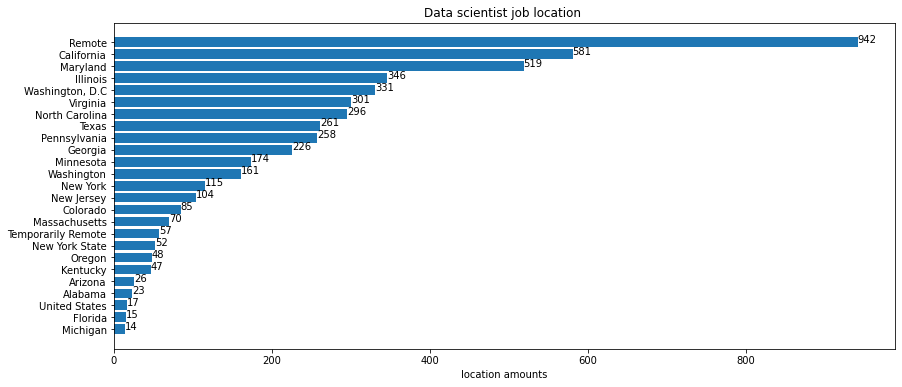

In [29]:
fig, axs = plt.subplots(figsize=[14, 6])
#bar char
axs.barh(loc_larger_10.keys(), loc_larger_10.values)
for i, rect in enumerate(loc_larger_10.values):
    axs.annotate(rect, xy=(rect, i))
axs.set_title("Data scientist job location ")
axs.set_xlabel('location amounts')

In [16]:
#Title analysis

df['Title'] = df['Title'].str.lower()
df['Title'].value_counts()[df['Title'].value_counts()>10].sort_values(ascending=False)

data scientist                              220
senior data scientist                       182
data science consultant                     133
manager, data science                       127
data scientist - omni analytics             121
                                           ... 
data scientist(gas experience preferred)     14
data scientist(10674282_963692)              14
data scientist(10674281_963695)              14
data scientist ii                            11
data scientist - senior consultant           11
Name: Title, Length: 81, dtype: int64